In [77]:
!wget -nc https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

File ‘data.csv’ already there; not retrieving.



In [78]:
import pandas as pd
df = pd.read_csv('data.csv')

In [79]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [80]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [81]:
string_cols = list(df.dtypes[df.dtypes == 'object'].index)

In [82]:
for col in string_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [83]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

## Distribution of price

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

price has long-tail distribution

/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


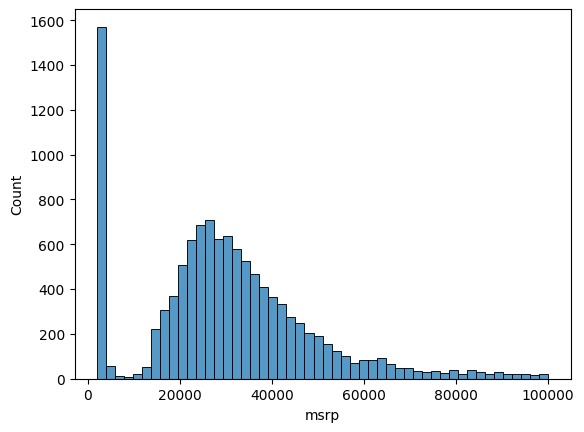

In [85]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50);

np.log1p() = log(x + 1)

we need to add 1 just in case because log(0) is undefined

In [86]:
log_price = np.log1p(df.msrp)

/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

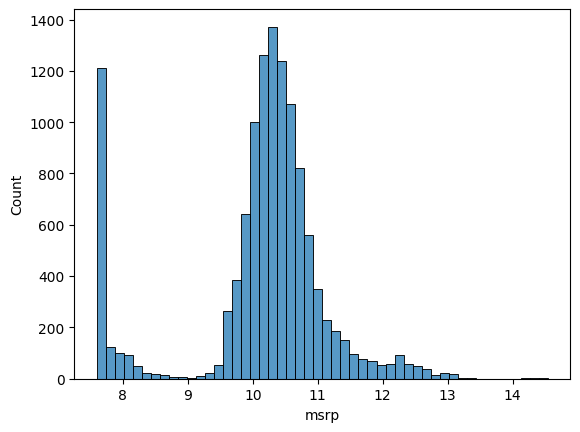

In [87]:
sns.histplot(log_price, bins=50)

## Missing values

In [88]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting up the validation framework

60 - 20 - 20  
train - val - test

In [89]:
n = len(df)

n_val = n_test = int(n*0.2)
n_train = n - n_val - n_test

In [90]:
n, n_val + n_train + n_test

(11914, 11914)

In [91]:
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

In [92]:
train_idx = idx[:n_train]
val_idx = idx[n_train: n_train + n_val]
test_idx = idx[n_train + n_val:]

In [93]:
df_train = df.iloc[train_idx]
df_val = df.iloc[val_idx]
df_test = df.iloc[test_idx]

In [94]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

### reset index

In [95]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

### log-transform and extract target

In [96]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

### remove target from features

In [97]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [98]:
len(y_train), len(y_val), len(y_test)

(7150, 2382, 2382)

# Linear regression

In [99]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [100]:
xi = [453, 11, 86]

In [101]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [102]:
def linear_regression(x):
    n  = len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred


In [103]:
linear_regression(xi)

12.312

### To go back from `np.log1p()` we need to use `np.expm1()`

In [104]:
np.expm1(linear_regression(xi))

222347.2221101062

In [105]:
np.expm1(y_train[10])

479775.00000000006

# Linear regression vector form

In [106]:
def linear_regression(x):
    return w0 + np.dot(xi, w)

In [107]:
linear_regression(xi)

12.312000000000001

In [108]:
def linear_regression(x):
    x = [1] + x
    return np.dot(x, w_new)

In [109]:
linear_regression(xi)

12.312000000000001

# Training a linear regression

In [110]:
def train_linear_regression(X, y):
    X = np.column_stack([np.ones(X.shape[0]), X])
    XTX = X.T @ X
    XTX_inv = np.linalg.inv(XTX)
    return XTX_inv @ X.T @ y

In [111]:
def predict(X, W):
    return W[0] + X @ W[1:]

# Car price baseline model

In [148]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train = df_train[base].fillna(0).values

In [149]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [150]:
W = train_linear_regression(X_train, y_train)

In [151]:
y_pred = predict(X_train, W)

In [152]:
def plot_pred_vs_true_hist(y_pred, y_true):
    sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
    sns.histplot(y_true, color='blue', alpha=0.5, bins=50)

/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-

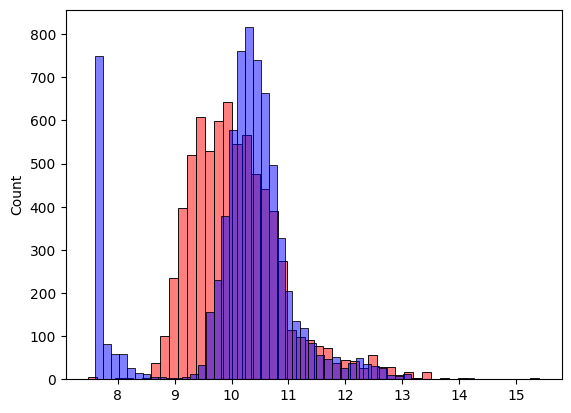

In [153]:
plot_pred_vs_true_hist(y_pred, y_train)

# RMSE

In [154]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [155]:
rmse(y_train, y_pred)

0.7554192603920132

# Validating the model

In [132]:
def prepare_X_1(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    return df_num.values

In [138]:
def train_and_calculate_rmse(prepare_X):
    X_train = prepare_X(df_train)
    W = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = predict(W=W, X=X_val)
    return y_pred, rmse(y_val, y_pred)

In [160]:
y_pred_1, rmse_1 = train_and_calculate_rmse(prepare_X=prepare_X_1)

/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-

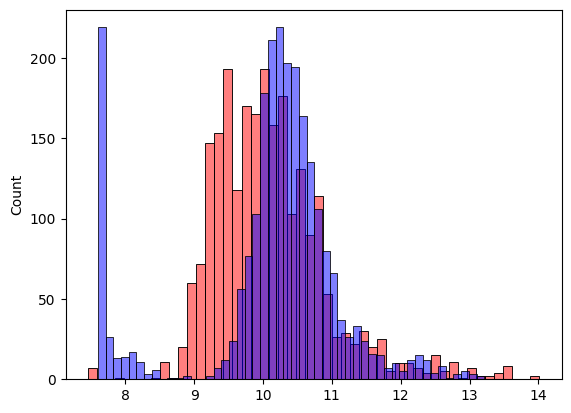

In [161]:
plot_pred_vs_true_hist(y_pred=y_pred_1, y_true=y_val)

# Simple feature engineering

In [162]:
dataset_year = df_train.year.max()

In [163]:
def prepare_X_2(df):
    df = df.copy()
    df['age'] = dataset_year - df.year
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    return df_num.values

In [164]:
y_pred_2, rmse_2 = train_and_calculate_rmse(prepare_X=prepare_X_2)

/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-

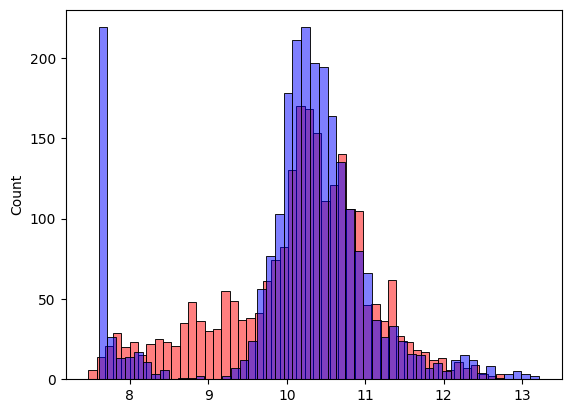

In [166]:
plot_pred_vs_true_hist(y_pred=y_pred_2, y_true=y_val)

# Categorical variables

In [170]:
def prepare_X_3(df):
    df = df.copy()
    features = base + ['age']

    df['age'] = dataset_year - df.year

    for v in [2, 3, 4]:
        df[f'num_doors_{v}'] = (df.number_of_doors == v).astype('int')
        features.append(f'num_doors_{v}')

    df_num = df[features]
    df_num = df_num.fillna(0)
    return df_num.values

In [171]:
y_pred_3, rmse_3 = train_and_calculate_rmse(prepare_X=prepare_X_3)

In [172]:
rmse_3

0.5157995641502287

/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-

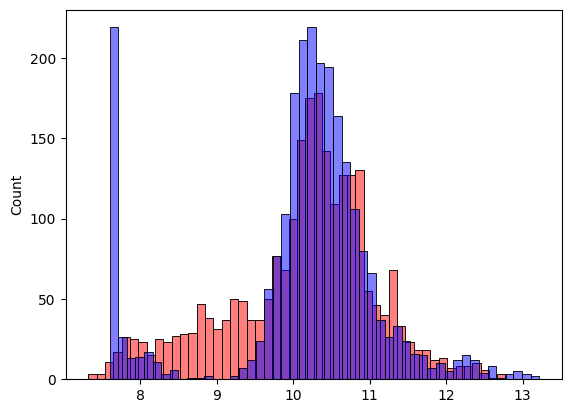

In [173]:
plot_pred_vs_true_hist(y_pred=y_pred_3, y_true=y_val)

### Add make feature

In [178]:
def prepare_X_4(df):
    df = df.copy()
    features = base + ['age']

    df['age'] = dataset_year - df.year

    for v in [2, 3, 4]:
        feat_name = f'num_doors_{v}'
        df[feat_name] = (df.number_of_doors == v).astype('int')
        features.append(feat_name)

    makes = list(df.make.value_counts().head().index)

    for m in makes:
        feat_name = f'make_{m}'
        df[feat_name] = (df.make == m).astype('int')
        features.append(feat_name)


    df_num = df[features]
    df_num = df_num.fillna(0)
    return df_num.values

In [180]:
y_pred_4, rmse_4 = train_and_calculate_rmse(prepare_X=prepare_X_4)
rmse_4

0.5076038849557069

/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-

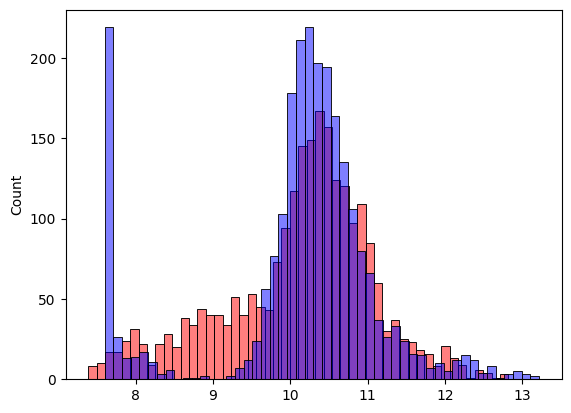

In [181]:
plot_pred_vs_true_hist(y_pred=y_pred_4, y_true=y_val)

### Add more categorical features

In [198]:
    categorical_variables = list(df.dtypes[df.dtypes == 'object'].index)
    categorical_variables.remove('model')
    categories = {
        c: list(df[c].value_counts().head().index) for c in categorical_variables
    }
    categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [203]:
def prepare_X_5(df):
    df = df.copy()
    features = base + ['age']

    df['age'] = dataset_year - df.year

    for v in [2, 3, 4]:
        feat_name = f'num_doors_{v}'
        df[feat_name] = (df.number_of_doors == v).astype('int')
        features.append(feat_name)

    categorical_variables = list(df.dtypes[df.dtypes == 'object'].index)
    categorical_variables.remove('model')
    categories = {
        c: list(df[c].value_counts().head().index) for c in categorical_variables
    }

    for c, values in categories.items():
        for v in values:
            feature_name = f'{c}_{v}'
            df[feature_name] = (df[c] == v).astype('int')
            features.append(feature_name)
        
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    return df_num.values

In [204]:
y_pred_5, rmse_5 = train_and_calculate_rmse(prepare_X=prepare_X_5)
rmse_5

541.1285784855895

/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexlitvinov/anaconda3/envs/machine-learning-zoomcamp/lib/python3.10/site-

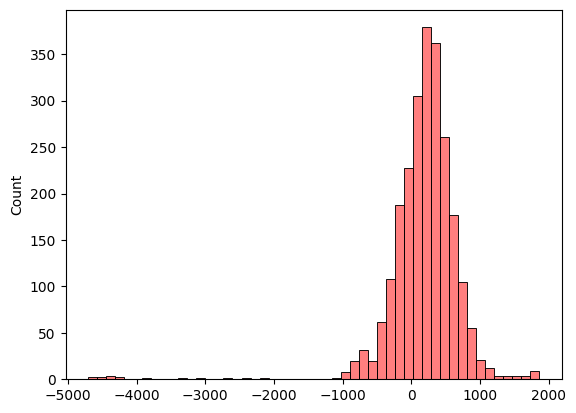

In [205]:
plot_pred_vs_true_hist(y_pred=y_pred_5, y_true=y_val)